In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("scrabble_board.jpeg")

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, ksize=3)

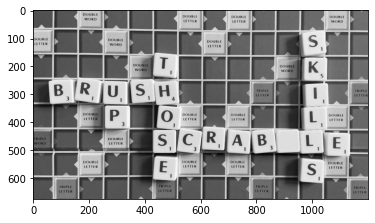

In [4]:
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_GRAY2RGB))

In [5]:
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
sharpened = cv2.filter2D(blur, kernel=sharpen_kernel, ddepth=cv2.CV_8UC1)

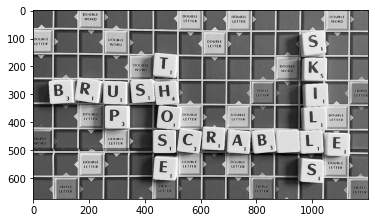

In [6]:
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_GRAY2RGB))

In [7]:
threshold, thresholded = cv2.threshold(sharpened, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

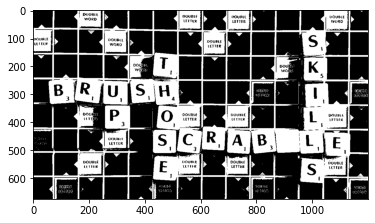

In [8]:
plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
clean = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel, iterations=2)

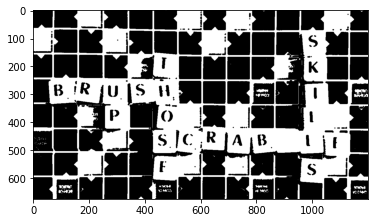

In [10]:
plt.imshow(cv2.cvtColor(clean, cv2.COLOR_GRAY2RGB))

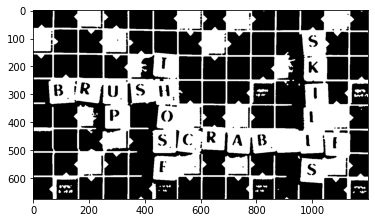

In [11]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
clean2 = cv2.morphologyEx(clean, cv2.MORPH_OPEN, kernel2, iterations=2)
plt.imshow(cv2.cvtColor(clean2, cv2.COLOR_GRAY2RGB))

In [14]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresholded,cv2.MORPH_OPEN,kernel, iterations = 3)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.08*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

True

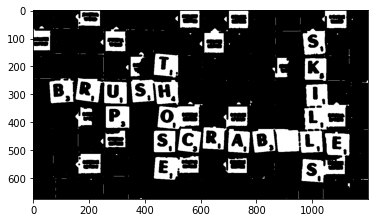

In [15]:
plt.imshow(cv2.cvtColor(sure_fg, cv2.COLOR_GRAY2RGB))
saveimg = cv2.cvtColor(sure_fg, cv2.COLOR_GRAY2RGB)
cv2.imwrite("lol.jpg", saveimg)

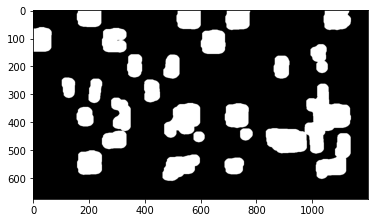

In [176]:
plt.imshow(cv2.cvtColor(clean2, cv2.COLOR_GRAY2RGB))

In [171]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [172]:
markers = cv2.watershed(img,markers)
img_annotated = img.copy()
img_annotated[markers == -1] = 255

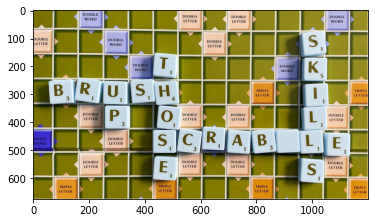

In [173]:
plt.imshow(img_annotated)

In [208]:
cnts, h = cv2.findContours(clean2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

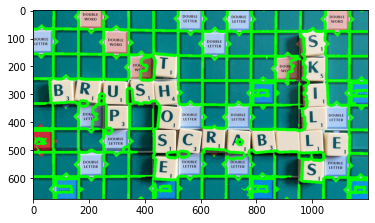

In [209]:
img_c = cv2.drawContours(img, cnts, -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))

In [143]:
m_kernel = np.ones((10,10),np.uint8)
m_img = cv2.dilate(thresholded, kernel=m_kernel)

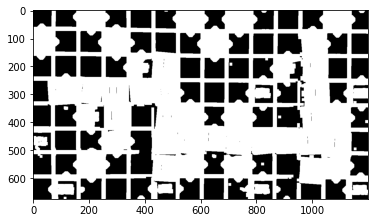

In [144]:
plt.imshow(cv2.cvtColor(m_img, cv2.COLOR_GRAY2RGB))

In [48]:
contours,hierarchy = cv2.findContours(m_img, 1, 2)

In [49]:
img_c = cv2.drawContours(img, contours, -1, (0,255,0), 3)

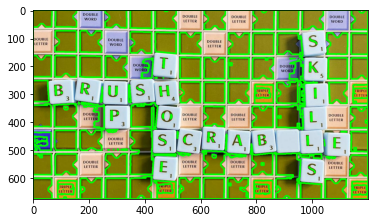

In [50]:
plt.imshow(img_c)

In [39]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 50:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x + w, y + h), (36,255,12), 2)

In [ ]:
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()